In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np



In [31]:

# Read the CSV file
df = pd.read_csv('./DOH_Dataset_2020.csv', parse_dates=['reportdate', 'addeddate', 'updateddate'])

# Convert date columns to MM-DD-YYYY format
date_columns = ['reportdate', 'addeddate', 'updateddate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col]).dt.strftime('%m-%d-%Y')

# Convert reportdate to numeric (days since the first date)
df['days'] = (pd.to_datetime(df['reportdate']) - pd.to_datetime(df['reportdate']).min()).dt.days

# Save the updated dataframe
df.to_pickle('DOH_Dataset_2020.pkl')

# Print the first few rows to verify the changes
print(df[['reportdate', 'addeddate', 'updateddate']].head())

# If you need to use the date columns for plotting or other date-based operations later,
# you may want to keep datetime versions of them:
for col in date_columns:
    df[f'{col}_dt'] = pd.to_datetime(df[col])

# Print dataframe info to see the new structure
df.info()

   reportdate   addeddate updateddate
0  09-10-2020  09-10-2020  09-10-2020
1  10-29-2020  10-29-2020  10-29-2020
2  10-21-2020  10-21-2020  10-21-2020
3  11-29-2020  11-29-2020  11-29-2020
4  10-07-2020  10-07-2020  10-07-2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480877 entries, 0 to 480876
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   updateddate     403486 non-null  object        
 1   addeddate       403486 non-null  object        
 2   reportdate      480877 non-null  object        
 3   other_adm       471040 non-null  float64       
 4   doctor_adm      471040 non-null  float64       
 5   nurse_adm       471040 non-null  float64       
 6   qother          471040 non-null  float64       
 7   qdoctor         471040 non-null  float64       
 8   qnurse          471040 non-null  float64       
 9   isolbed_o       471040 non-null  float64       
 10  isolbed_v       4710

In [32]:
# Read the pickle file
df = pd.read_pickle('./DOH_Dataset_2020.pkl')

# Query the number of entries with the region 'NATIONAL CAPITAL REGION (NCR)'
ncr_entries = df[df['region'] == 'NATIONAL CAPITAL REGION (NCR)'].shape[0]

print(f"Number of entries for NATIONAL CAPITAL REGION (NCR): {ncr_entries}")

# Alternative method using value_counts()
region_counts = df['region'].value_counts()
ncr_entries_alt = region_counts.get('NATIONAL CAPITAL REGION (NCR)', 0)

print(f"Number of entries for NATIONAL CAPITAL REGION (NCR) (using value_counts): {ncr_entries_alt}")

# Print the first few entries for NCR
print("\nFirst few entries for NATIONAL CAPITAL REGION (NCR):")


# Print total number of entries and shape as before
total_entries = len(df)
print(f"\nTotal number of entries in the DataFrame: {total_entries}")
print(f"Shape of the DataFrame (rows, columns): {df.shape}")

print(df[df['region'] == 'NATIONAL CAPITAL REGION (NCR)'].head())

Number of entries for NATIONAL CAPITAL REGION (NCR): 759
Number of entries for NATIONAL CAPITAL REGION (NCR) (using value_counts): 759

First few entries for NATIONAL CAPITAL REGION (NCR):

Total number of entries in the DataFrame: 480877
Shape of the DataFrame (rows, columns): (480877, 23)
      updateddate   addeddate  reportdate  other_adm  doctor_adm  nurse_adm  \
14289  11-21-2020  11-21-2020  11-21-2020        0.0         0.0        0.0   
14290  12-29-2020  12-29-2020  12-29-2020        0.0         0.0        0.0   
14291  12-25-2020  12-25-2020  12-25-2020        0.0         0.0        0.0   
14292  12-27-2020  12-27-2020  12-27-2020        0.0         0.0        0.0   
14293         NaN         NaN  12-28-2020        0.0         0.0        0.0   

       qother  qdoctor  qnurse  isolbed_o  ...  \
14289     0.0      0.0     0.0       11.0  ...   
14290     0.0      0.0     0.0        6.0  ...   
14291     0.0      0.0     0.0        5.0  ...   
14292     0.0      0.0     0.0   

In [30]:
# Read the pickle file
df = pd.read_pickle('./DOH_Dataset.pkl')

# Create a new DataFrame with entries from NCR and only reportdate and region columns
ncr_df = df[df['region'] == 'NATIONAL CAPITAL REGION (NCR)'][['reportdate', 'region']]

# Sort the DataFrame by increasing reportdate
ncr_df_sorted = ncr_df.sort_values('reportdate')

# Reset the index of the sorted DataFrame
ncr_df_sorted = ncr_df_sorted.reset_index(drop=True)

# Display the shape of the sorted DataFrame
print(f"\nShape of sorted NCR DataFrame (rows, columns): {ncr_df_sorted.shape}")

# Display the number of unique dates
print(f"\nNumber of unique dates: {ncr_df_sorted['reportdate'].nunique()}")

# Display the date range
print(f"Date range: from {ncr_df_sorted['reportdate'].min()} to {ncr_df_sorted['reportdate'].max()}")

# Optional: Save the sorted DataFrame
ncr_df_sorted.to_pickle('NCR_Dataset_Sorted.pkl')
print("\nSorted NCR DataFrame saved as 'NCR_Dataset_Sorted.pkl'")




ncr_df_sorted.info()

ncr_df_sorted.head()




Shape of sorted NCR DataFrame (rows, columns): (175368, 2)

Number of unique dates: 1112
Date range: from 01-01-2021 to 12-31-2023

Sorted NCR DataFrame saved as 'NCR_Dataset_Sorted.pkl'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175368 entries, 0 to 175367
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reportdate  175368 non-null  object
 1   region      175368 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


,reportdate,region
0,01-01-2021,NATIONAL CAPITAL REGION (NCR)
1,01-01-2021,NATIONAL CAPITAL REGION (NCR)
2,01-01-2021,NATIONAL CAPITAL REGION (NCR)
3,01-01-2021,NATIONAL CAPITAL REGION (NCR)
4,01-01-2021,NATIONAL CAPITAL REGION (NCR)


In [ ]:

# Read the pickle filef = pd.read_csv('./DOH_Dataset.csv', parse_dates=['reportdate', 'addeddate', 'updateddate'])

# Convert date columns to MM-DD-YYYY format
date_columns = ['reportdate', 'addeddate', 'updateddate']


for col in date_columns:
    df[col] = pd.to_datetime(df[col]).dt.strftime('%m-%d-%Y')

# Convert reportdate to numeric (days since the first date)
df['days'] = (pd.to_datetime(df['reportdate']) - pd.to_datetime(df['reportdate']).min()).dt.days

# Save the updated dataframe
df.to_pickle('DOH_Dataset.pkl')

# Print the first few rows to verify the changes
print(df[['reportdate', 'addeddate', 'updateddate']].head())

# If you need to use the date columns for plotting or other date-based operations later,
# you may want to keep datetime versions of them:
for col in date_columns:
    df[f'{col}_dt'] = pd.to_datetime(df[col])

# Print dataframe info to see the new structure
print(df.info())


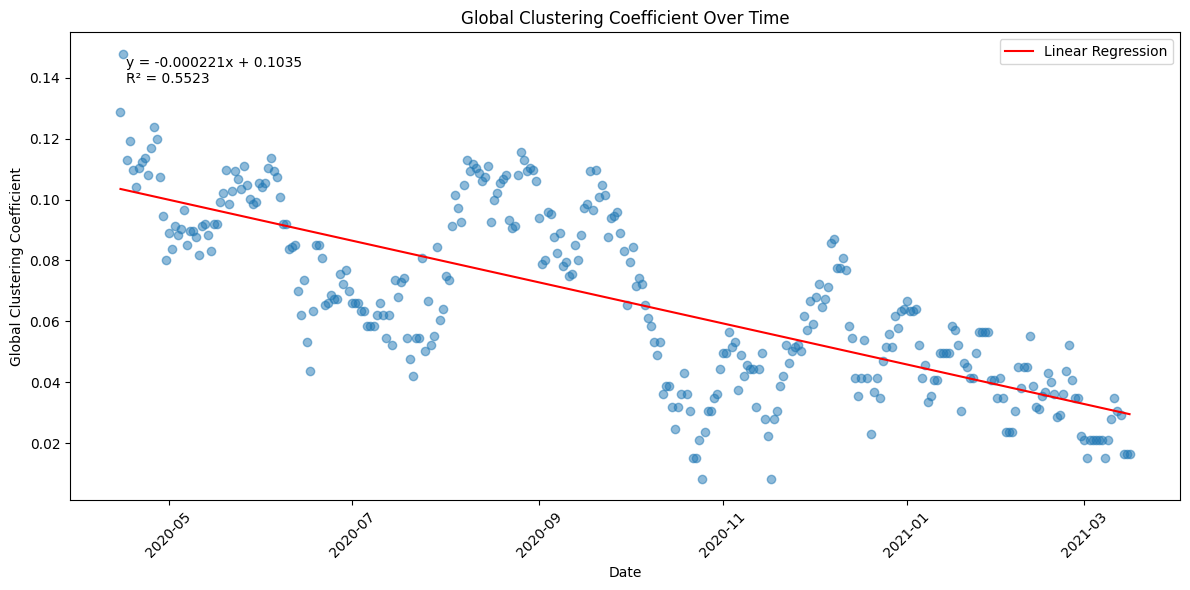

In [5]:
# Read the CSV file
df = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.4.csv', parse_dates=['date'])

# Convert date to numeric (days since the first date)
df['date'] = pd.to_datetime(df['date'])
df['days'] = (df['date'] - df['date'].min()).dt.days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['days'], df['global_cc'])

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['global_cc'], alpha=0.5)
plt.plot(df['date'], intercept + slope * df['days'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Global Clustering Coefficient Over Time')
plt.xlabel('Date')
plt.ylabel('Global Clustering Coefficient')
plt.legend()

# Add text with regression details
text = f'y = {slope:.6f}x + {intercept:.4f}\nR² = {r_value**2:.4f}'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, verticalalignment='top')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()


    
plt.savefig("../../graphs/global_cc_regression_MSV_0.6.png", bbox_inches='tight')
plt.savefig("../../graphs/global_cc_regression_MSV_0.6.pdf", bbox_inches='tight')

plt.show()

# Print additional statistics

